# BIKE SHARING ASSIGNMENT- Tushar Joshi

Problem Statement
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

 

Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
 

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing sci kit learn Library
import sklearn

In [3]:
pd.options.display.max_columns=200
pd.options.display.max_rows=200

In [4]:
# Importing Warnings

import warnings
warnings.filterwarnings('ignore')

### STEP-1: Reading and Understanding the data

In [5]:
# Reading the file

day= pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspecting the various aspects of the data frame "day"

In [6]:
# Checking the shape

day.shape

(730, 16)

In [7]:
# Checking the datatype

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking for null Values in the dataset

day.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset

In [9]:
# "instant" column seems to be just a a column for sequence, hence we can drop this column.

day=day.drop(["instant"], axis=1)

In [10]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Inspecting the various numerical columns in the dataset.

day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# LET'S VISUALISE THE DATA

## STEP- 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **Visualising the data**.
- Visualisation helps us to identify any multicollinearity in the dataset.
- We can also identify any predictor variables, that have a strong association with the Target Variable "cnt"

We'll visualise our data using `matplotlib` and `seaborn`.

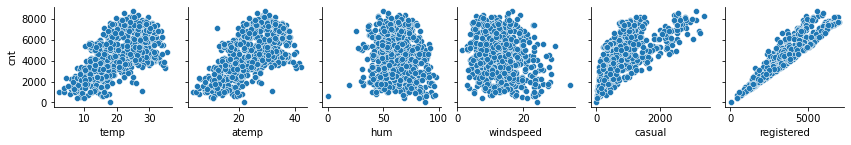

In [12]:
# Visualising the data of all the numerical columns against "cnt"

sns.pairplot(day,x_vars=["temp","atemp","hum","windspeed","casual","registered"], y_vars="cnt",size=2,diag_kind=None)
plt.show()

We see that variables, "registered", "casual","temp" and "atemp" show a linear relation with count. We can conclude that *Linear Regression*, is the right model for this dataset.

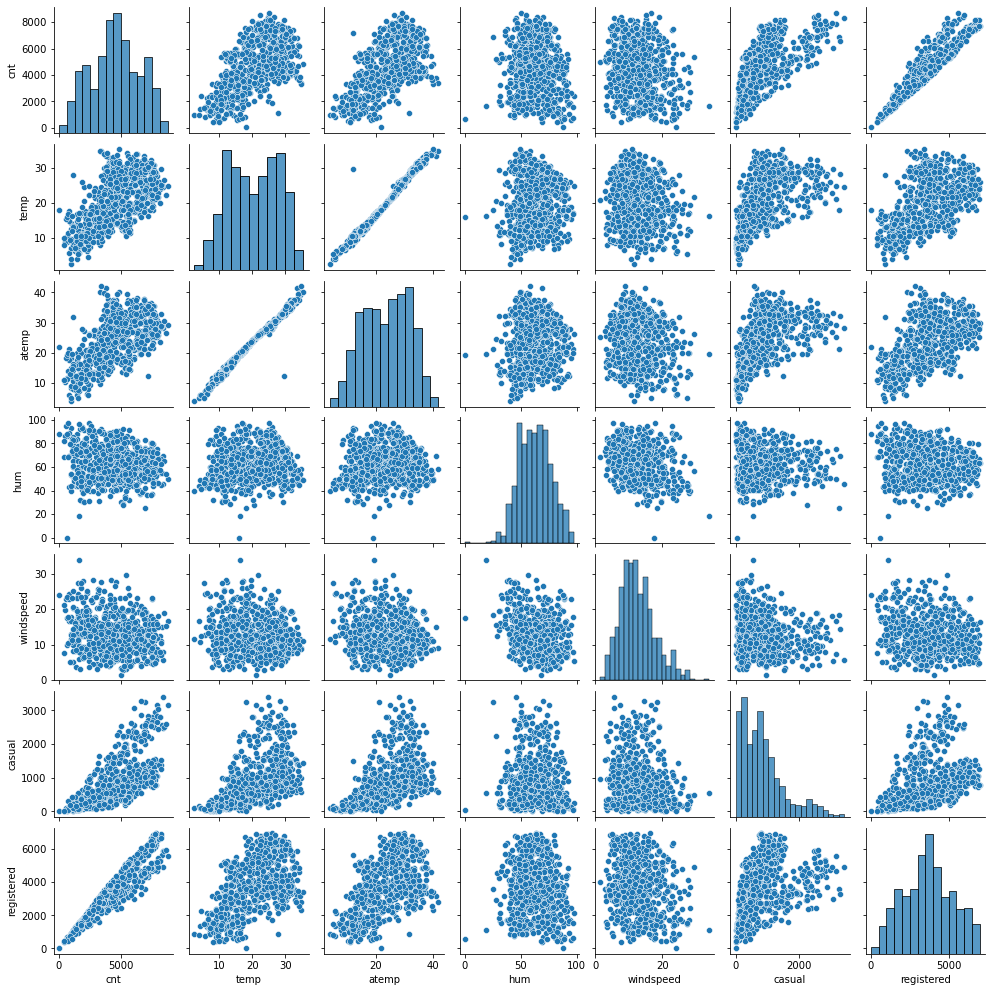

In [13]:
# NOW LET'S VISUALISE THE DATA OF ALL THE NUMERICAL COLUMNS

sns.pairplot(data=day, vars=["cnt","temp","atemp","hum","windspeed","casual","registered"], size=2)
plt.show()

 Inspecting if the target variable "cnt", and other independent variables, have any sort of linear relationship with each other, we see that there variables like "temp","atemp","casual" have some sort of linear relation ship
    . Also checking if any multicolliearity is in place, with other independent variables.

We  also see that **temp** and **atemp** are dependent on each other, hence there is an instance of multicollinearity.

we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered


In [14]:
day.drop(["dteday","casual","registered"],axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


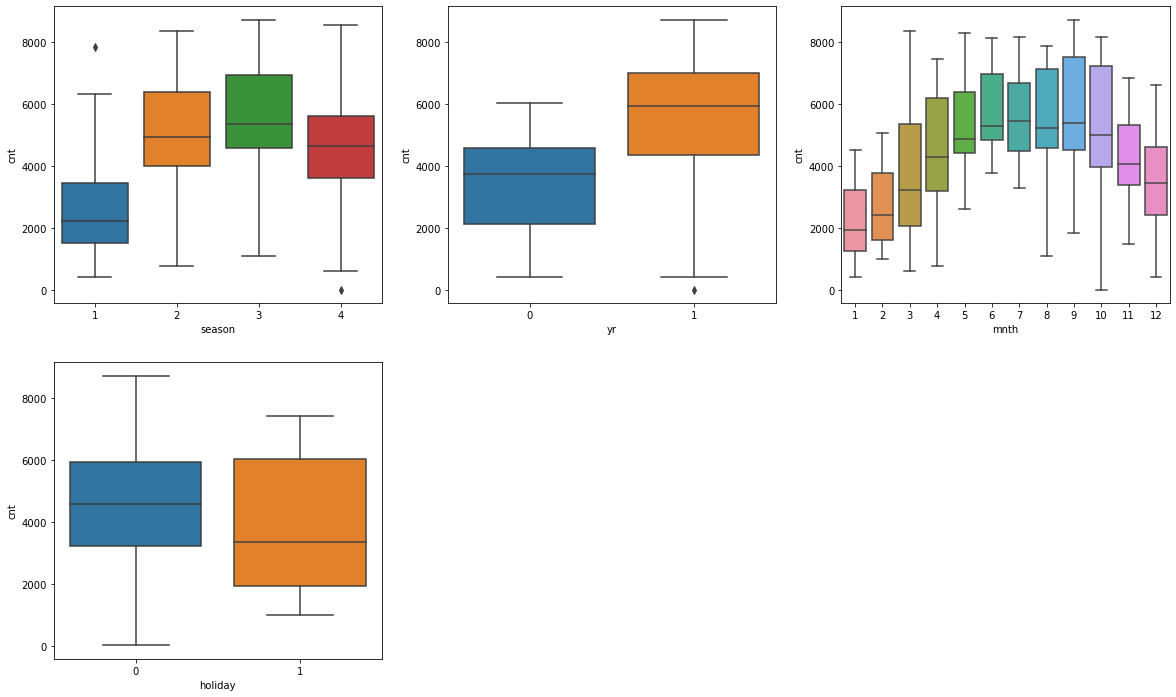

In [15]:
# Making Box Plots for categorical variables.

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.show()

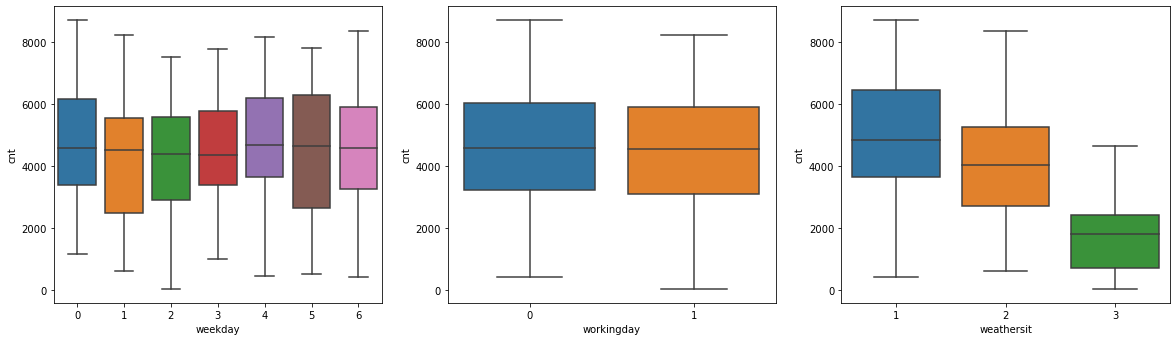

In [16]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

#### Inferences from the categorcal columns

- The cnt for bike shares incresed in the year 2019
- The median values of cnt are almost similar, if it's a working day or weekend/holiday.
- The bike sharing is the least in the spring
- The bike sharing is least on Mondays
- The bike sharing values increases in summer months



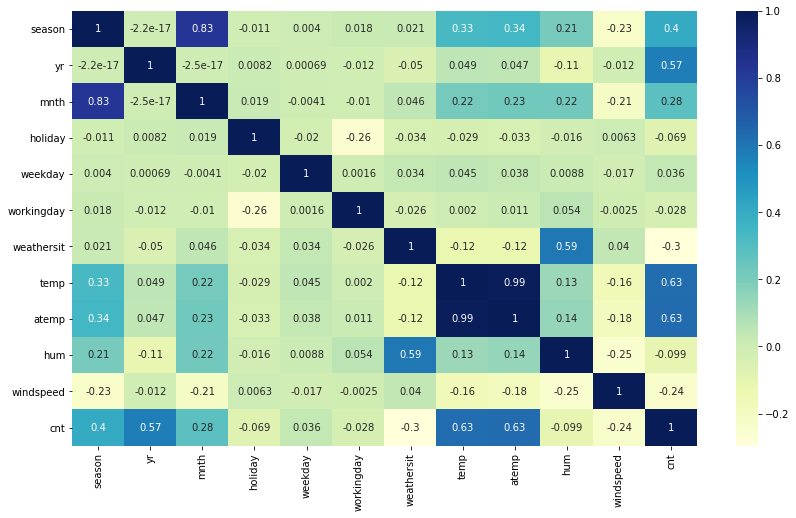

In [17]:
# Plotting Heatmap, to check the correlations.

plt.figure(figsize = (14, 8))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

We see that **temp** and **atemp**, have a correlation of **0.99**.

## STEP- 3:  Data Preperation


In [18]:
# Checking the elements of the categorical columns.

print(day.weathersit.value_counts(normalize=True))
print(day.season.value_counts(normalize=True))
print(day.weekday.value_counts(normalize=True))
print(day.mnth.value_counts(normalize=True))


1    0.634247
2    0.336986
3    0.028767
Name: weathersit, dtype: float64
3    0.257534
2    0.252055
1    0.246575
4    0.243836
Name: season, dtype: float64
2    0.143836
1    0.143836
6    0.142466
5    0.142466
4    0.142466
3    0.142466
0    0.142466
Name: weekday, dtype: float64
12    0.084932
10    0.084932
8     0.084932
7     0.084932
5     0.084932
3     0.084932
1     0.084932
11    0.082192
9     0.082192
6     0.082192
4     0.082192
2     0.076712
Name: mnth, dtype: float64


We know that the columns weathersit, mnth, weekday, and season are categorical columns with **numeric float** values, hence convering these columns to **object**.


In [19]:
#Converting variables to object type


categorical_cols=["mnth","season","weathersit","weekday"]
day[categorical_cols]=day[categorical_cols].astype(object)
day[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mnth        730 non-null    object
 1   season      730 non-null    object
 2   weathersit  730 non-null    object
 3   weekday     730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


We see that the categorical columns have been converted to object data type.

In [20]:
# Inspecting the categorical columns.

day[categorical_cols].head()

,mnth,season,weathersit,weekday
0,1,1,2,1
1,1,1,2,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [21]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Now renaming the different levels of categorical_cols, for further preperation of data


In [22]:
day["weathersit"]=day["weathersit"].replace({1: "clear", 2: "mist/cloudy",3: "Light snow/rain",4: "heavy rain"})
print(day.weathersit.value_counts(normalize=True))



clear              0.634247
mist/cloudy        0.336986
Light snow/rain    0.028767
Name: weathersit, dtype: float64


In [23]:
day["weekday"].replace(to_replace = [0,1,2,3,4,5,6], value=["sunday","monday","tuesday","wednesday","thursday","friday","saturday"], inplace=True)
print(day.weekday.value_counts(normalize=True))


monday       0.143836
tuesday      0.143836
friday       0.142466
wednesday    0.142466
sunday       0.142466
thursday     0.142466
saturday     0.142466
Name: weekday, dtype: float64


In [24]:
day["mnth"].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12], value=["jan","feb","march","apr","may","jun","jul","aug","sept","oct","nov","dec"], inplace=True)
print(day.mnth.value_counts(normalize=True))


may      0.084932
jan      0.084932
jul      0.084932
aug      0.084932
march    0.084932
oct      0.084932
dec      0.084932
nov      0.082192
apr      0.082192
sept     0.082192
jun      0.082192
feb      0.076712
Name: mnth, dtype: float64


In [25]:
day["season"].replace(to_replace = [1,2,3,4], value=["spring","summer","fall","winter"], inplace=True)
print(day.season.value_counts(normalize=True))


fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64


# Now creating dummy variables.

In [26]:
dummy_vars=pd.get_dummies(day[["season","mnth","weekday","weathersit"]], drop_first=True)


In [27]:
# Concatinating the dummy variables to the original dataframe.

day=pd.concat([day, dummy_vars ], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_mist/cloudy
0,spring,0,jan,0,monday,1,mist/cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tuesday,1,mist/cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,spring,0,jan,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,spring,0,jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
# Dropping the original variables, for which the dummy's were created.

day.drop(["season","mnth","weekday","weathersit"], axis = 1, inplace = True)


In [29]:
#Checking the shape of the new dataset
day.shape

(730, 30)

In [30]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   season_spring           730 non-null    uint8  
 9   season_summer           730 non-null    uint8  
 10  season_winter           730 non-null    uint8  
 11  mnth_aug                730 non-null    uint8  
 12  mnth_dec                730 non-null    uint8  
 13  mnth_feb                730 non-null    uint8  
 14  mnth_jan                730 non-null    ui

In [31]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_mist/cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
day.shape

(730, 30)

In [33]:
print(day.nunique(axis=0))

yr                          2
holiday                     2
workingday                  2
temp                      498
atemp                     689
hum                       594
windspeed                 649
cnt                       695
season_spring               2
season_summer               2
season_winter               2
mnth_aug                    2
mnth_dec                    2
mnth_feb                    2
mnth_jan                    2
mnth_jul                    2
mnth_jun                    2
mnth_march                  2
mnth_may                    2
mnth_nov                    2
mnth_oct                    2
mnth_sept                   2
weekday_monday              2
weekday_saturday            2
weekday_sunday              2
weekday_thursday            2
weekday_tuesday             2
weekday_wednesday           2
weathersit_clear            2
weathersit_mist/cloudy      2
dtype: int64


## Step 4: Splitting the Data into Training and Testing Sets and performing Scaling.

The essential step for regression is performing a **train-test split** followed by **Rescaling**.



In [34]:
#Importing the sci kit learn library

from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test=train_test_split(day, train_size=0.8, test_size=0.2, random_state=100)
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)


The test and train data sets have split in the right proportion

In [35]:
# Inspecting train set
df_train.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_mist/cloudy
367,1,0,1,6.150000,6.31375,44.1250,24.499957,2236,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
648,1,0,1,17.835000,21.55835,46.3333,12.166932,7570,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
44,0,0,1,17.015000,19.91750,37.5833,27.999836,1913,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
705,1,0,0,13.154153,16.09790,76.4167,8.750200,5008,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
379,1,0,1,6.833347,8.08125,41.9167,16.834286,2311,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [36]:
#Inspecting test set
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_mist/cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


#  Rescaling the Numerical features

In [37]:
# importing the necessary librariries for the minmax scaling
from sklearn.preprocessing import MinMaxScaler

In [38]:
# intsantitaing an object
scaler=MinMaxScaler()

In [39]:
# Apply scaler() to all the numerical columns except the binary columns and 'dummy' variables
num_vars=["temp","atemp","hum","windspeed","cnt"]


In [40]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

Checking the numerical columns that we Rescaled.


In [41]:
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_mist/cloudy
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
705,1,0,0,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
379,1,0,1,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [42]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_mist/cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.630137,0.342466
std,0.500241,0.163378,0.446377,0.225336,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.483181,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### All the values of the Numerical Columns are between 0 and 1.

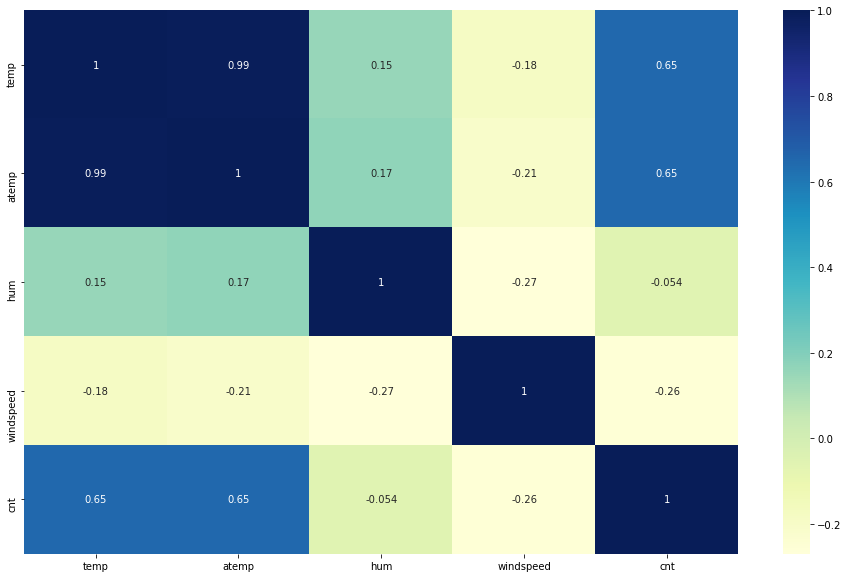

In [43]:
# Let's check the numerical columns correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

### We see that "temp" and "atemp" are highly correlated

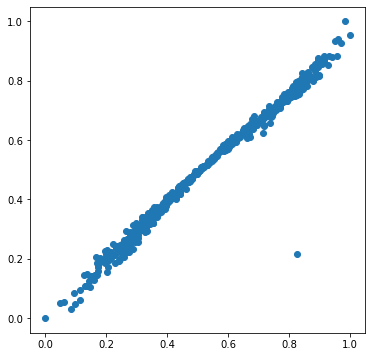

In [44]:
# Scatter plot bw temp and atemp
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.atemp)
plt.show()

As temp and atemp are highly correlated, in order to avoid multicollinearity in our model, we can drop temp.


In [45]:
df_train.drop("temp", inplace=True, axis=1)

### Dividing X & Y sets for Model Building

In [46]:
y_train=df_train.pop("cnt")
X_train=df_train

In [47]:
y_train.head()

367    0.254717
648    0.868385
44     0.217556
705    0.573631
379    0.263346
Name: cnt, dtype: float64

In [48]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_mist/cloudy
367,1,0,1,0.061963,0.454701,0.695175,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
648,1,0,1,0.462175,0.477458,0.299450,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
44,0,0,1,0.419099,0.387290,0.807474,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
705,1,0,0,0.318824,0.787463,0.189819,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
379,1,0,1,0.108365,0.431945,0.449210,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


We see that the "cnt", variable is not part of the X_train.


## Step 5: Building a Linear Model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

#####  Using the RFE method, to select the most important features

In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [51]:
# List of columns selected after RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 10),
 ('mnth_jun', False, 4),
 ('mnth_march', False, 13),
 ('mnth_may', False, 3),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_monday', False, 8),
 ('weekday_saturday', False, 6),
 ('weekday_sunday', False, 7),
 ('weekday_thursday', False, 14),
 ('weekday_tuesday', False, 9),
 ('weekday_wednesday', False, 11),
 ('weathersit_clear', True, 1),
 ('weathersit_mist/cloudy', True, 1)]

In [52]:
#Inspecting the Columns selected by RFE. We start with these columns  and perform manual elimination

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_jan',
       'mnth_nov', 'mnth_sept', 'weathersit_clear', 'weathersit_mist/cloudy'],
      dtype='object')

In [53]:
# Dropping the columns with less significance after RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_feb', 'mnth_jul', 'mnth_jun', 'mnth_march',
       'mnth_may', 'mnth_oct', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed Statistical analysis

## 1st model

In [54]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [56]:
# Create a linear regression model. 

lm = sm.OLS(y_train,X_train_rfe).fit() 

In [57]:
# Summary of the linear regression model obtained

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     206.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.29e-218
Time:                        20:32:14   Log-Likelihood:                 586.32
No. Observations:                 584   AIC:                            -1141.
Df Residuals:                     568   BIC:                            -1071.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  


,Features,VIF
0,const,150.06
14,weathersit_clear,11.06
15,weathersit_mist/cloudy,9.56
6,season_spring,5.67
3,atemp,4.03
8,season_winter,3.87
7,season_summer,3.08
4,hum,1.97
12,mnth_nov,1.68
9,mnth_aug,1.67


We see that the P values seem to be fine, we drop "weathersit_clear" which has VIF of 11.06

In [59]:
# Creating a dataset, without "weathersit_clear"
X_train_1 = X_train_rfe.drop(["weathersit_clear"], axis = 1)

In [60]:
# Adding the constant 
X_train_lm = sm.add_constant(X_train_1)

In [61]:
# Creating lr model
lm = sm.OLS(y_train,X_train_1).fit() 


In [62]:
# Obtained summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.85e-201
Time:                        20:32:47   Log-Likelihood:                 542.20
No. Observations:                 584   AIC:                            -1054.
Df Residuals:                     569   BIC:                            -988.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [63]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  



,Features,VIF
0,const,84.67
6,season_spring,5.60
3,atemp,3.90
8,season_winter,3.85
7,season_summer,3.05
12,mnth_nov,1.67
9,mnth_aug,1.66
4,hum,1.64
11,mnth_jan,1.62
10,mnth_dec,1.45


dropping "mnth_jan" due to a high P-Value of 0.090

In [64]:
# dropping "mnth_jan" from the new model.  

X_train_1 = X_train_1.drop(["mnth_jan"], axis = 1)

In [65]:
#Adding constant
X_train_lm = sm.add_constant(X_train_1)

In [66]:
# creating the lr Model
lm = sm.OLS(y_train,X_train_1).fit() 


In [67]:
# obtained summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     198.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.71e-201
Time:                        20:33:11   Log-Likelihood:                 540.73
No. Observations:                 584   AIC:                            -1053.
Df Residuals:                     570   BIC:                            -992.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [68]:
# VIF values of the new model
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  


,Features,VIF
0,const,79.92
6,season_spring,5.59
8,season_winter,3.80
3,atemp,3.50
7,season_summer,2.98
9,mnth_aug,1.66
4,hum,1.64
11,mnth_nov,1.64
13,weathersit_mist/cloudy,1.43
12,mnth_sept,1.40


Dropping "mnth_dec" due to high P-Value of 0.086

In [69]:
#Dropping ""mnth_dec""
X_train_1 = X_train_1.drop(["mnth_dec"], axis = 1)

In [70]:
X_train_lm = sm.add_constant(X_train_1)

In [71]:
lm = sm.OLS(y_train,X_train_1).fit() 

In [74]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     213.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          4.97e-202
Time:                        20:34:20   Log-Likelihood:                 539.21
No. Observations:                 584   AIC:                            -1052.
Df Residuals:                     571   BIC:                            -995.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [75]:
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  


,Features,VIF
0,const,77.36
6,season_spring,5.49
8,season_winter,3.74
3,atemp,3.26
7,season_summer,2.92
9,mnth_aug,1.65
4,hum,1.63
10,mnth_nov,1.45
12,weathersit_mist/cloudy,1.42
11,mnth_sept,1.37


Dropping "season_spring" dut to a high P-Value of 0.113

In [77]:
# Dropping "season_spring"  
X_train_1 = X_train_1.drop(["season_spring"], axis = 1)


In [79]:
X_train_lm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train,X_train_1).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     232.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.12e-202
Time:                        20:34:54   Log-Likelihood:                 537.93
No. Observations:                 584   AIC:                            -1052.
Df Residuals:                     572   BIC:                            -999.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [80]:
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  


,Features,VIF
0,const,43.37
7,season_winter,1.67
4,hum,1.61
3,atemp,1.50
11,weathersit_mist/cloudy,1.42
9,mnth_nov,1.41
6,season_summer,1.40
8,mnth_aug,1.39
10,mnth_sept,1.20
5,windspeed,1.14


Dropping mnth_nov due to high p_value of 0.152

In [81]:
# Dropping mnth_nov

X_train_1 = X_train_1.drop(["mnth_nov"], axis = 1)


In [82]:
X_train_lm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train,X_train_1).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     254.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.89e-203
Time:                        20:35:10   Log-Likelihood:                 536.88
No. Observations:                 584   AIC:                            -1052.
Df Residuals:                     573   BIC:                            -1004.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [83]:
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  



,Features,VIF
0,const,43.18
4,hum,1.61
3,atemp,1.49
10,weathersit_mist/cloudy,1.42
6,season_summer,1.40
8,mnth_aug,1.39
7,season_winter,1.29
9,mnth_sept,1.20
5,windspeed,1.14
1,yr,1.02


Dropping "weathersit_mist/cloudy" as we believe it makes business sense to drop, because during "cloudy and misty" weather conditions demand will be naturally low. 

In [84]:
# Dropping "weathersit_mist/cloudy"
X_train_1 = X_train_1.drop(["weathersit_mist/cloudy"], axis = 1)


In [85]:
X_train_lm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train,X_train_1).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     280.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.32e-203
Time:                        20:37:43   Log-Likelihood:                 534.34
No. Observations:                 584   AIC:                            -1049.
Df Residuals:                     574   BIC:                            -1005.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3024      0.026     11.816

In [86]:
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  


,Features,VIF
0,const,40.03
3,atemp,1.42
6,season_summer,1.39
8,mnth_aug,1.39
7,season_winter,1.29
9,mnth_sept,1.20
4,hum,1.17
5,windspeed,1.14
1,yr,1.02
2,holiday,1.01


In [87]:
X_train_1.head()

,const,yr,holiday,atemp,hum,windspeed,season_summer,season_winter,mnth_aug,mnth_sept
367,1.0,1,0,0.061963,0.454701,0.695175,0,0,0,0
648,1.0,1,0,0.462175,0.477458,0.299450,0,1,0,0
44,1.0,0,0,0.419099,0.387290,0.807474,0,0,0,0
705,1.0,1,0,0.318824,0.787463,0.189819,0,1,0,0
379,1.0,1,0,0.108365,0.431945,0.449210,0,0,0,0


The R2 and Adjusted R-Squared values of the final model are

**R-squared:       0.815   and 
Adj. R-squared:  0.812**

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [88]:
y_train_pred = lm.predict(X_train_1)

Text(0.5, 0, 'Errors')

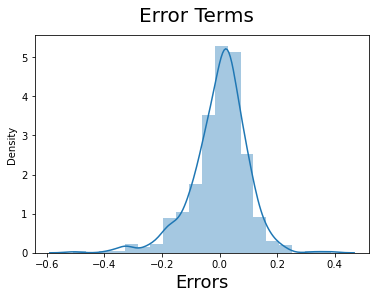

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## The distribution is centred around zero and is qualitatively normal. Hence we can say that the model satisfies the assupmtions of linear regression

## Step 7 Predictions and evaluations on the test set
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.


In [90]:
# scaling the test data set and transforming it.

num_vars=["temp","atemp","hum","windspeed","cnt"]
# We dont fit and transform the test data set, we only transform the test data set
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_mist/cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [91]:
# checking if the variables are scaled in the test data set
df_test.describe()
df_test.shape

(146, 30)

In [92]:
# we see that the max values of test set are not 1. As we have used data from the training set.

## Dividing X and Y for Test

In [93]:
y_test = df_test.pop('cnt')
X_test = df_test

In [94]:
y_test.shape

(146,)

In [95]:
X_test.shape

(146, 29)

In [96]:
# Adding the constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_mist/cloudy
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [97]:
# Assigning all the columns that was in final X_train dataset.
X_test_sm=X_test_sm[["const","yr","holiday","atemp","hum","windspeed","season_summer","season_winter","mnth_aug","mnth_sept"]]

In [98]:
X_test_sm.head()

,const,yr,holiday,atemp,hum,windspeed,season_summer,season_winter,mnth_aug,mnth_sept
184,1.0,0,1,0.769660,0.657364,0.084219,0,0,0,0
535,1.0,1,0,0.842587,0.610133,0.153728,1,0,0,0
299,1.0,0,0,0.496145,0.837699,0.334206,0,1,0,0
221,1.0,0,0,0.795343,0.437098,0.339570,0,0,1,0
152,1.0,0,0,0.741471,0.314298,0.537414,1,0,0,0


In [99]:
X_test_sm.shape

(146, 10)

### Hence all the columns that were dropped in the train set, have been dropped in the test set. 

In [101]:
# Adding the constant to the test set
X_test_sm = sm.add_constant(X_test_sm)

In [102]:
# assigning the test values to the y_predicted data set
y_test_pred=lm.predict(X_test_sm)

## Step 9: Model Evaluation


Text(0, 0.5, 'y_pred')

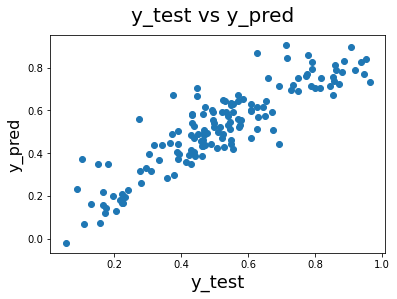

In [103]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [104]:
# Evaluating the R2 of the test set.

from sklearn.metrics import r2_score

In [105]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.784997443826628

In [107]:
#Assigning the R2 value to the variable r2

r2=0.784997443826628

In [108]:
# let us get the Adjusted R2 value 

# n is the number rows in X

n= X_test_sm.shape[0]

# Number of features (predictors, p) is the shape along axis 1

p = X_test_sm.shape[1]-1

# we find the Adjusted R-squared value using above formula

adjusted_r2 = 1-(((1-r2)*(n-1))/(n-p-1))
adjusted_r2

0.7707693334916254

# Final Results

Train Set Results:
    **R2 Value:0.815 and 
 Adj R-Squared:0.812**
    
Test Set Results:
    **R2 Value:0.78 and 
Adj R-Squared:0.77**

    
    

## We can conclude that this is a good model, and will be able to generalise, various other data sets.

# The equation for best fitted line is



#### cnt= 0.2240 X yr - 0.0897 X holiday +  0.6176 X atemp - 0.3499 X hum - 0.2087 X windspeed +0.1029 X season_summer + 0.1480  X season_winter + 0.0660 X mnth_aug +0.1164 X mnth_sept 

As per the Model created, the top predictor variables that influences the business are:

    

**yr, holiday, atemp, hum, windspeed, season_summer, season_winter, mnth_aug, mnth_sept**  in that order.
   
    
    

## The Positively related coefficients are



**"yr", "atemp", "season_summer","season_winter","mnth_aug", "mnth_sept "**

### Meaning as the above variables increase, the bike sharing count increases by their respective coefficients

## The Negatively related coefficients are


**"holiday", "windspeed", "hum"**

### Meaning as the above variables increase, the bike sharing count decreases, by their respective coefficients

## Inferences to consider for prediciting the demand

- As the feeling temperature increases, the demand increases
- The demand increases during summer and winter season
-The bookings are highest in the month of August and September
-The bookings drop during holidays
-As windspeed and humidity increases, customers dont prefer to share the bike